In [1]:
# importing required libraries
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import tree

from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import r2_score

In [2]:
# importing the dataset
og_data = pd.read_csv(r'../Dataset/RTADataset.csv')
og_data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [3]:
og_data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [4]:
# cleaning the dataset
data = og_data.copy()

# maintaining the only required columns in the data set
data = data.loc[:, ['Age_band_of_driver', 
                    'Vehicle_driver_relation', 
                    'Driving_experience', 
                    'Types_of_Junction', 
                    'Road_surface_type', 
                    'Light_conditions', 
                    'Weather_conditions',
                    'Vehicle_movement', 
                    'Cause_of_accident', 
                    'Accident_severity']]

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Vehicle_driver_relation  11737 non-null  object
 2   Driving_experience       11487 non-null  object
 3   Types_of_Junction        11429 non-null  object
 4   Road_surface_type        12144 non-null  object
 5   Light_conditions         12316 non-null  object
 6   Weather_conditions       12316 non-null  object
 7   Vehicle_movement         12008 non-null  object
 8   Cause_of_accident        12316 non-null  object
 9   Accident_severity        12316 non-null  object
dtypes: object(10)
memory usage: 962.3+ KB
None


In [5]:
# replacing the value for accident severity
data.Accident_severity = data.Accident_severity.map({'Slight Injury':0, 'Serious Injury':1, 'Fatal injury':2})

#dropping the rows of the dataset with NaN and unknown values
data.replace(['Unknown', 'unknown'], np.nan, inplace=True)
data.dropna(inplace=True)

data

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Vehicle_movement,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,No junction,Asphalt roads,Daylight,Normal,Going straight,Moving Backward,0
1,31-50,Employee,Above 10yr,No junction,Asphalt roads,Daylight,Normal,Going straight,Overtaking,0
2,18-30,Employee,1-2yr,No junction,Asphalt roads,Daylight,Normal,Going straight,Changing lane to the left,1
3,18-30,Employee,5-10yr,Y Shape,Earth roads,Darkness - lights lit,Normal,Going straight,Changing lane to the right,0
4,18-30,Employee,2-5yr,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Going straight,Overtaking,0
...,...,...,...,...,...,...,...,...,...,...
12309,31-50,Employee,5-10yr,No junction,Asphalt roads,Darkness - lights lit,Normal,Going straight,Driving to the left,0
12311,31-50,Employee,2-5yr,No junction,Asphalt roads,Daylight,Normal,Going straight,No distancing,0
12313,Over 51,Employee,5-10yr,No junction,Asphalt roads,Daylight,Normal,Other,Changing lane to the right,1
12314,18-30,Employee,Above 10yr,No junction,Asphalt roads,Darkness - lights lit,Normal,Other,Driving under the influence of drugs,0


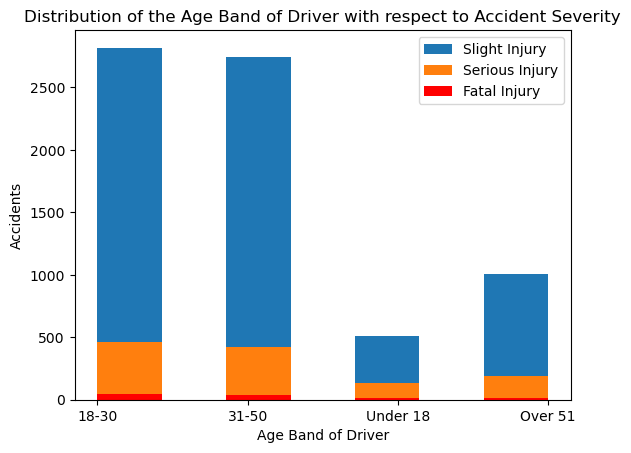

In [6]:
# for presenting the data with respect to the predictors in histogram
import matplotlib.pyplot as plt

slight_injury = data[data["Accident_severity"] == 0]
serious_injury = data[data["Accident_severity"] == 1]
fatal_injury = data[data["Accident_severity"] == 2]

# creating the histogram for age band of driver
plt.hist(slight_injury["Age_band_of_driver"], bins=7, alpha=1, label="Slight Injury")
plt.hist(serious_injury["Age_band_of_driver"], bins=7, alpha=1, label="Serious Injury")
plt.hist(fatal_injury["Age_band_of_driver"], bins=7, alpha=1, label="Fatal Injury", color='red')
plt.title("Distribution of the Age Band of Driver with respect to Accident Severity")
plt.xlabel("Age Band of Driver")
plt.ylabel("Accidents")
plt.legend()
plt.show()

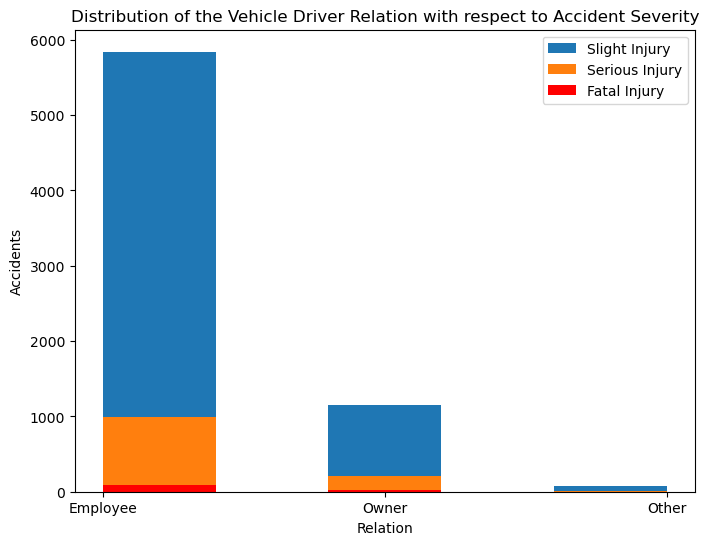

In [7]:
plt.figure(figsize=(8, 6))

# creating the histogram for vehicle driver relation
plt.hist(slight_injury["Vehicle_driver_relation"], bins=5, alpha=1, label="Slight Injury")
plt.hist(serious_injury["Vehicle_driver_relation"], bins=5, alpha=1, label="Serious Injury")
plt.hist(fatal_injury["Vehicle_driver_relation"], bins=5, alpha=1, label="Fatal Injury", color='red')
plt.title("Distribution of the Vehicle Driver Relation with respect to Accident Severity")
plt.xlabel("Relation")
plt.ylabel("Accidents")
plt.legend()
plt.show()

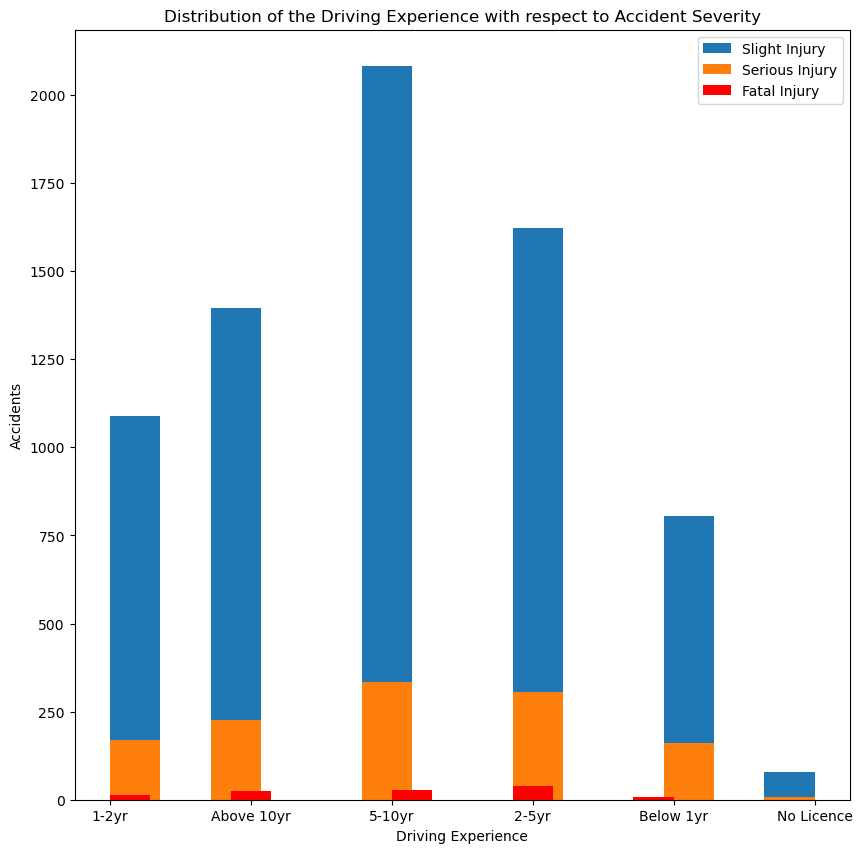

In [8]:
plt.figure(figsize=(10, 10))

# creating the histogram for driving experience
plt.hist(slight_injury["Driving_experience"], bins=14, alpha=1, label="Slight Injury")
plt.hist(serious_injury["Driving_experience"], bins=14, alpha=1, label="Serious Injury")
plt.hist(fatal_injury["Driving_experience"], bins=14, alpha=1, label="Fatal Injury", color='red')
plt.title("Distribution of the Driving Experience with respect to Accident Severity")
plt.xlabel("Driving Experience")
plt.ylabel("Accidents")
plt.legend()
plt.show()

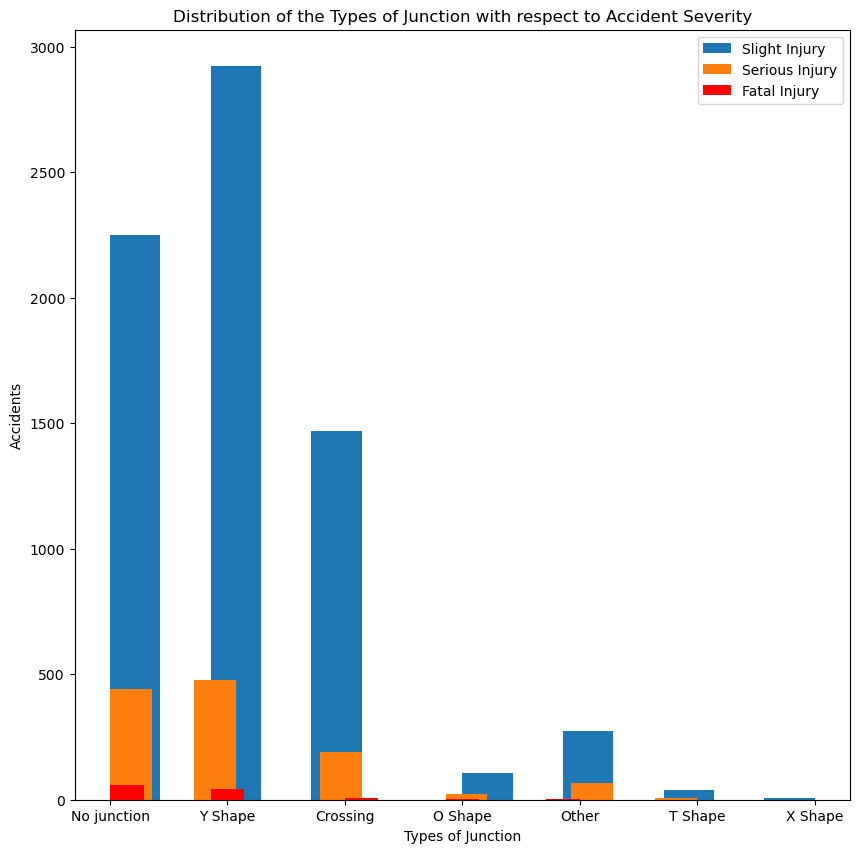

In [9]:
plt.figure(figsize=(10, 10))

# creating the histogram for types of junction
plt.hist(slight_injury["Types_of_Junction"], bins=14, alpha=1, label="Slight Injury")
plt.hist(serious_injury["Types_of_Junction"], bins=14, alpha=1, label="Serious Injury")
plt.hist(fatal_injury["Types_of_Junction"], bins=14, alpha=1, label="Fatal Injury", color='red')
plt.title("Distribution of the Types of Junction with respect to Accident Severity")
plt.xlabel("Types of Junction")
plt.ylabel("Accidents")
plt.legend()
plt.show()

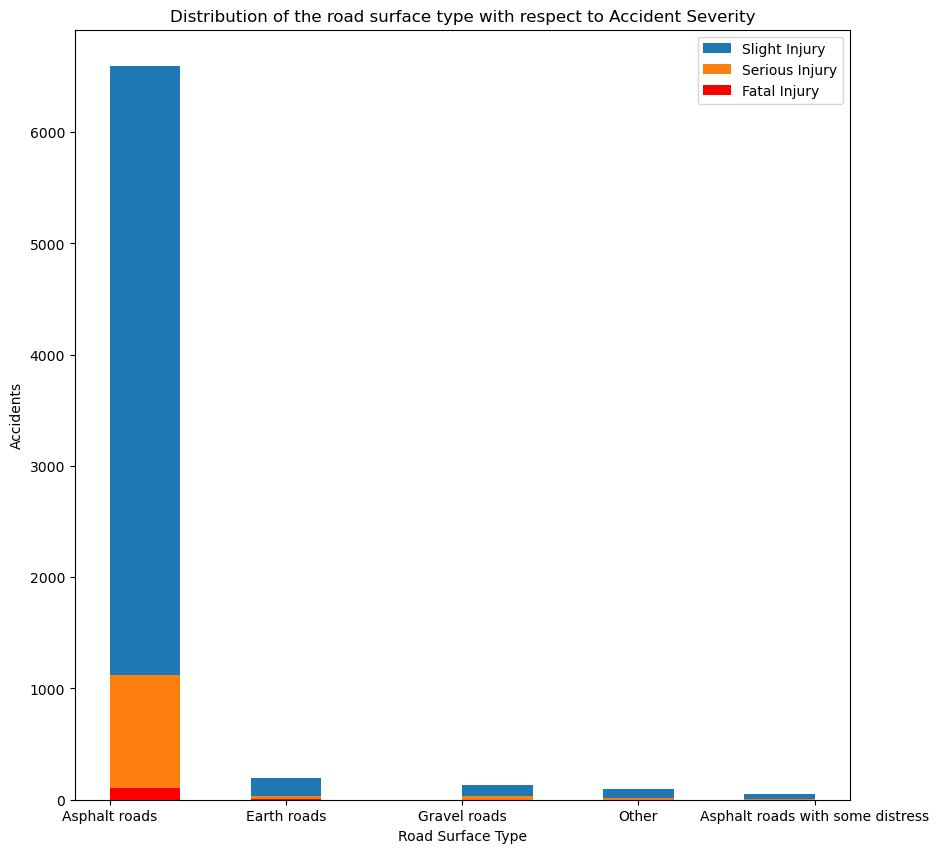

In [10]:
plt.figure(figsize=(10, 10))

# creating the histogram for road surface type
plt.hist(slight_injury["Road_surface_type"], bins=10, alpha=1, label="Slight Injury")
plt.hist(serious_injury["Road_surface_type"], bins=10, alpha=1, label="Serious Injury")
plt.hist(fatal_injury["Road_surface_type"], bins=10, alpha=1, label="Fatal Injury", color='red')
plt.title("Distribution of the road surface type with respect to Accident Severity")
plt.xlabel("Road Surface Type")
plt.ylabel("Accidents")
plt.legend()
plt.show()

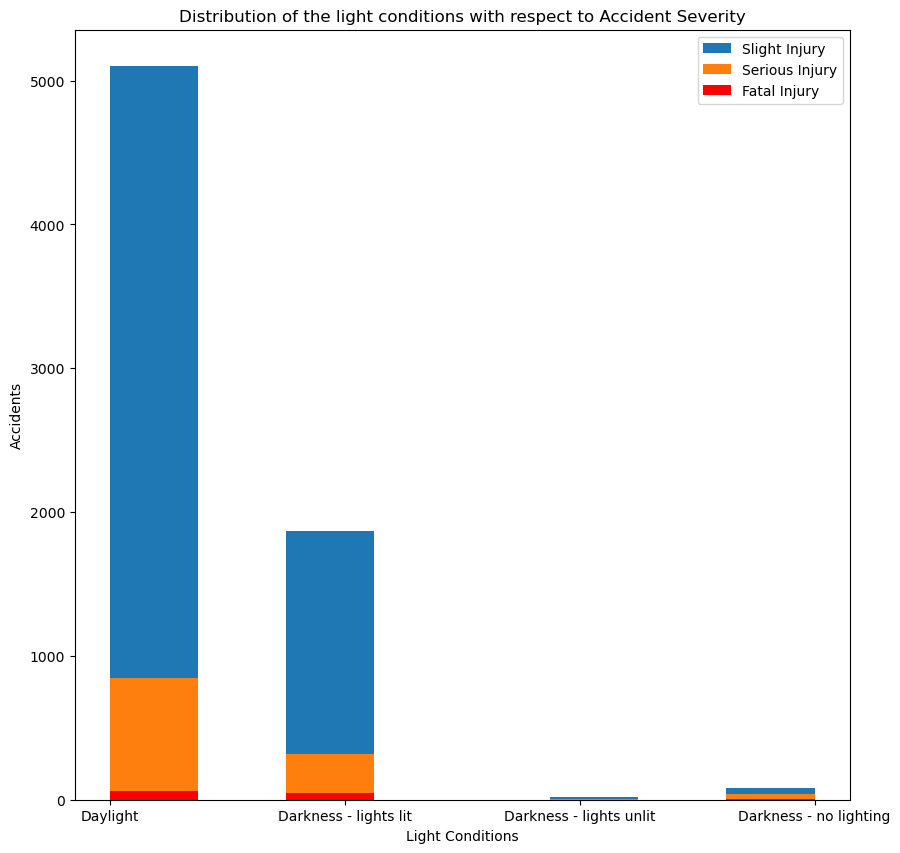

In [11]:
plt.figure(figsize=(10, 10))

# creating the histogram for light conditions
plt.hist(slight_injury["Light_conditions"], bins=8, alpha=1, label="Slight Injury")
plt.hist(serious_injury["Light_conditions"], bins=8, alpha=1, label="Serious Injury")
plt.hist(fatal_injury["Light_conditions"], bins=8, alpha=1, label="Fatal Injury", color='red')
plt.title("Distribution of the light conditions with respect to Accident Severity")
plt.xlabel("Light Conditions")
plt.ylabel("Accidents")
plt.legend()
plt.show()

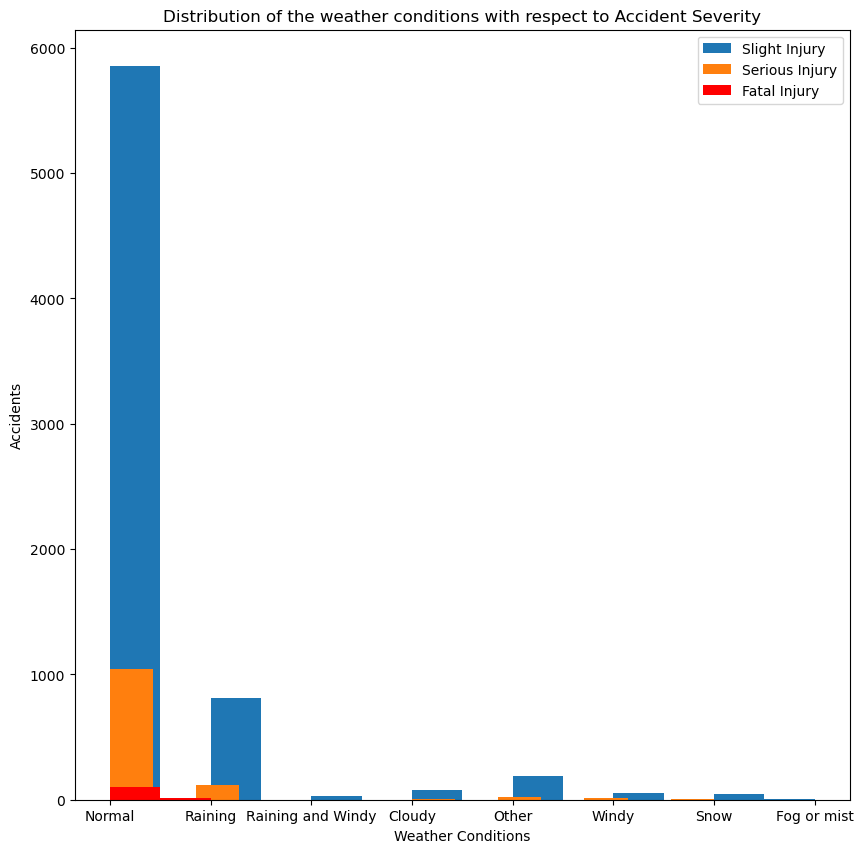

In [12]:
plt.figure(figsize=(10, 10))

# creating the histogram for weather conditions
plt.hist(slight_injury["Weather_conditions"], bins=14, alpha=1, label="Slight Injury")
plt.hist(serious_injury["Weather_conditions"], bins=14, alpha=1, label="Serious Injury")
plt.hist(fatal_injury["Weather_conditions"], bins=2, alpha=1, label="Fatal Injury", color='red')
plt.title("Distribution of the weather conditions with respect to Accident Severity")
plt.xlabel("Weather Conditions")
plt.ylabel("Accidents")
plt.legend()
plt.show()

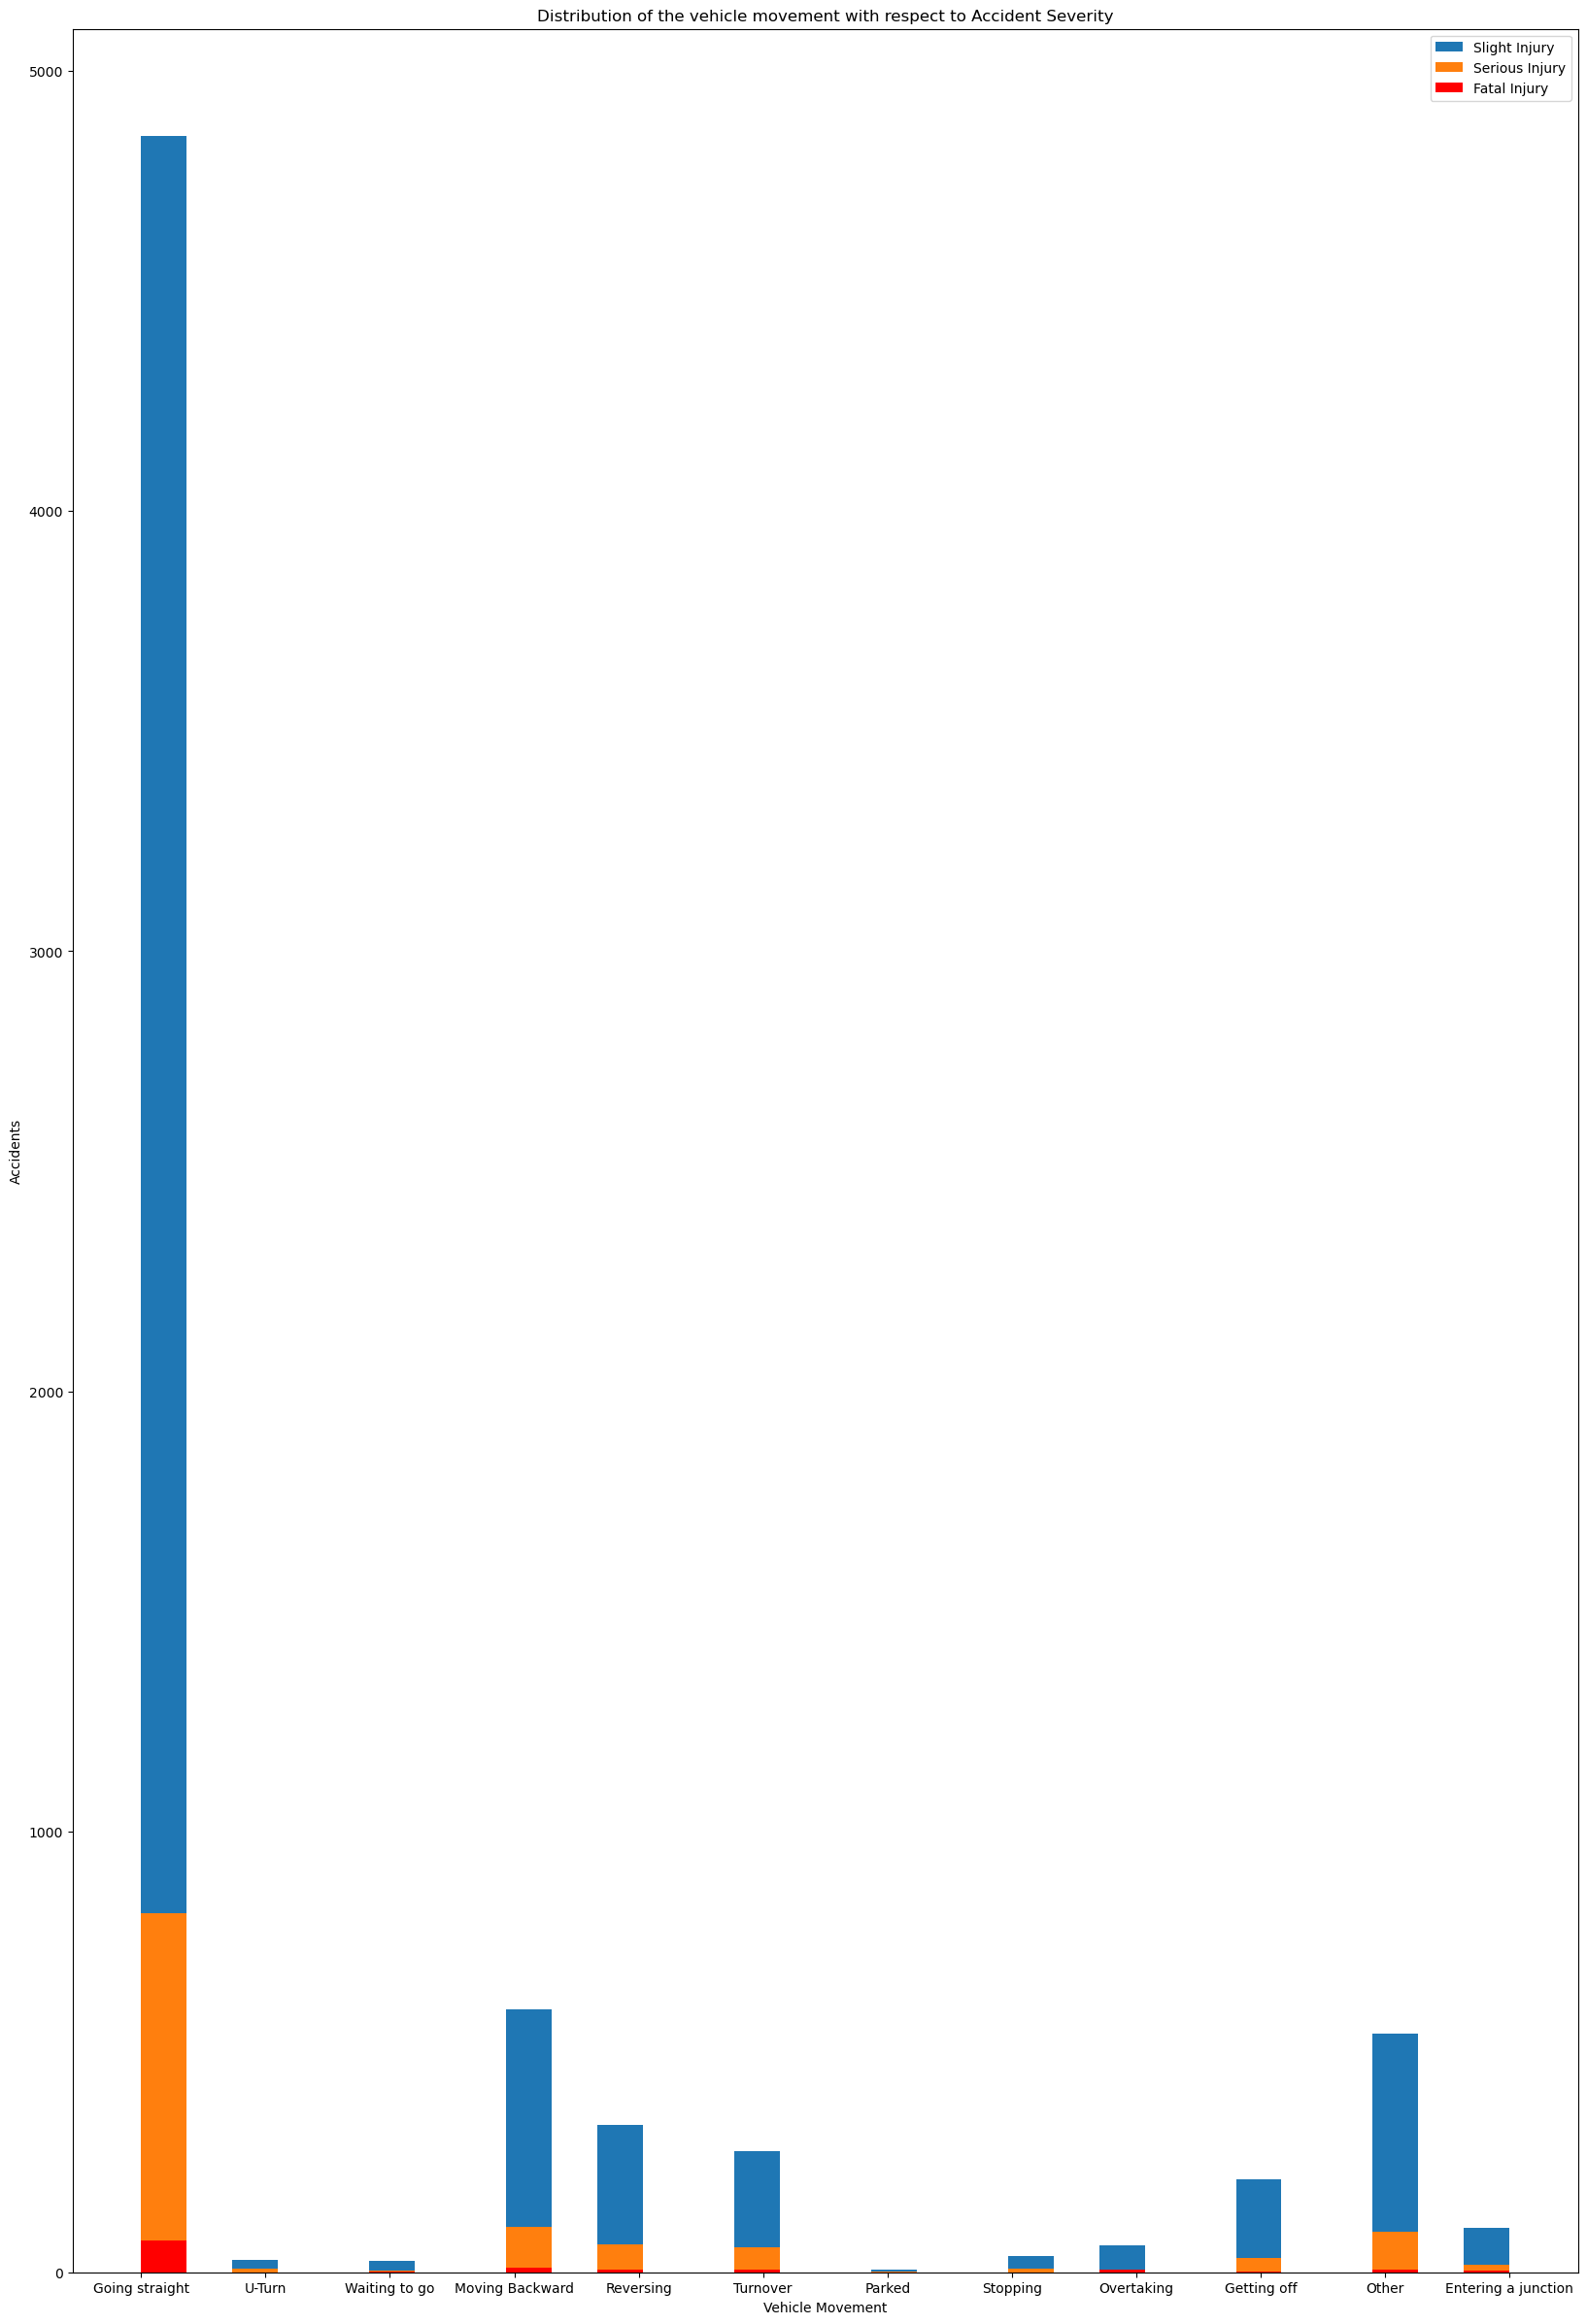

In [13]:
plt.figure(figsize=(20, 30))

# creating the histogram for vehicle movement
plt.hist(slight_injury["Vehicle_movement"], bins=30, alpha=1, label="Slight Injury")
plt.hist(serious_injury["Vehicle_movement"], bins=30, alpha=1, label="Serious Injury")
plt.hist(fatal_injury["Vehicle_movement"], bins=30, alpha=1, label="Fatal Injury", color='red')
plt.title("Distribution of the vehicle movement with respect to Accident Severity")
plt.xlabel("Vehicle Movement")
plt.ylabel("Accidents")
plt.legend()
plt.show()

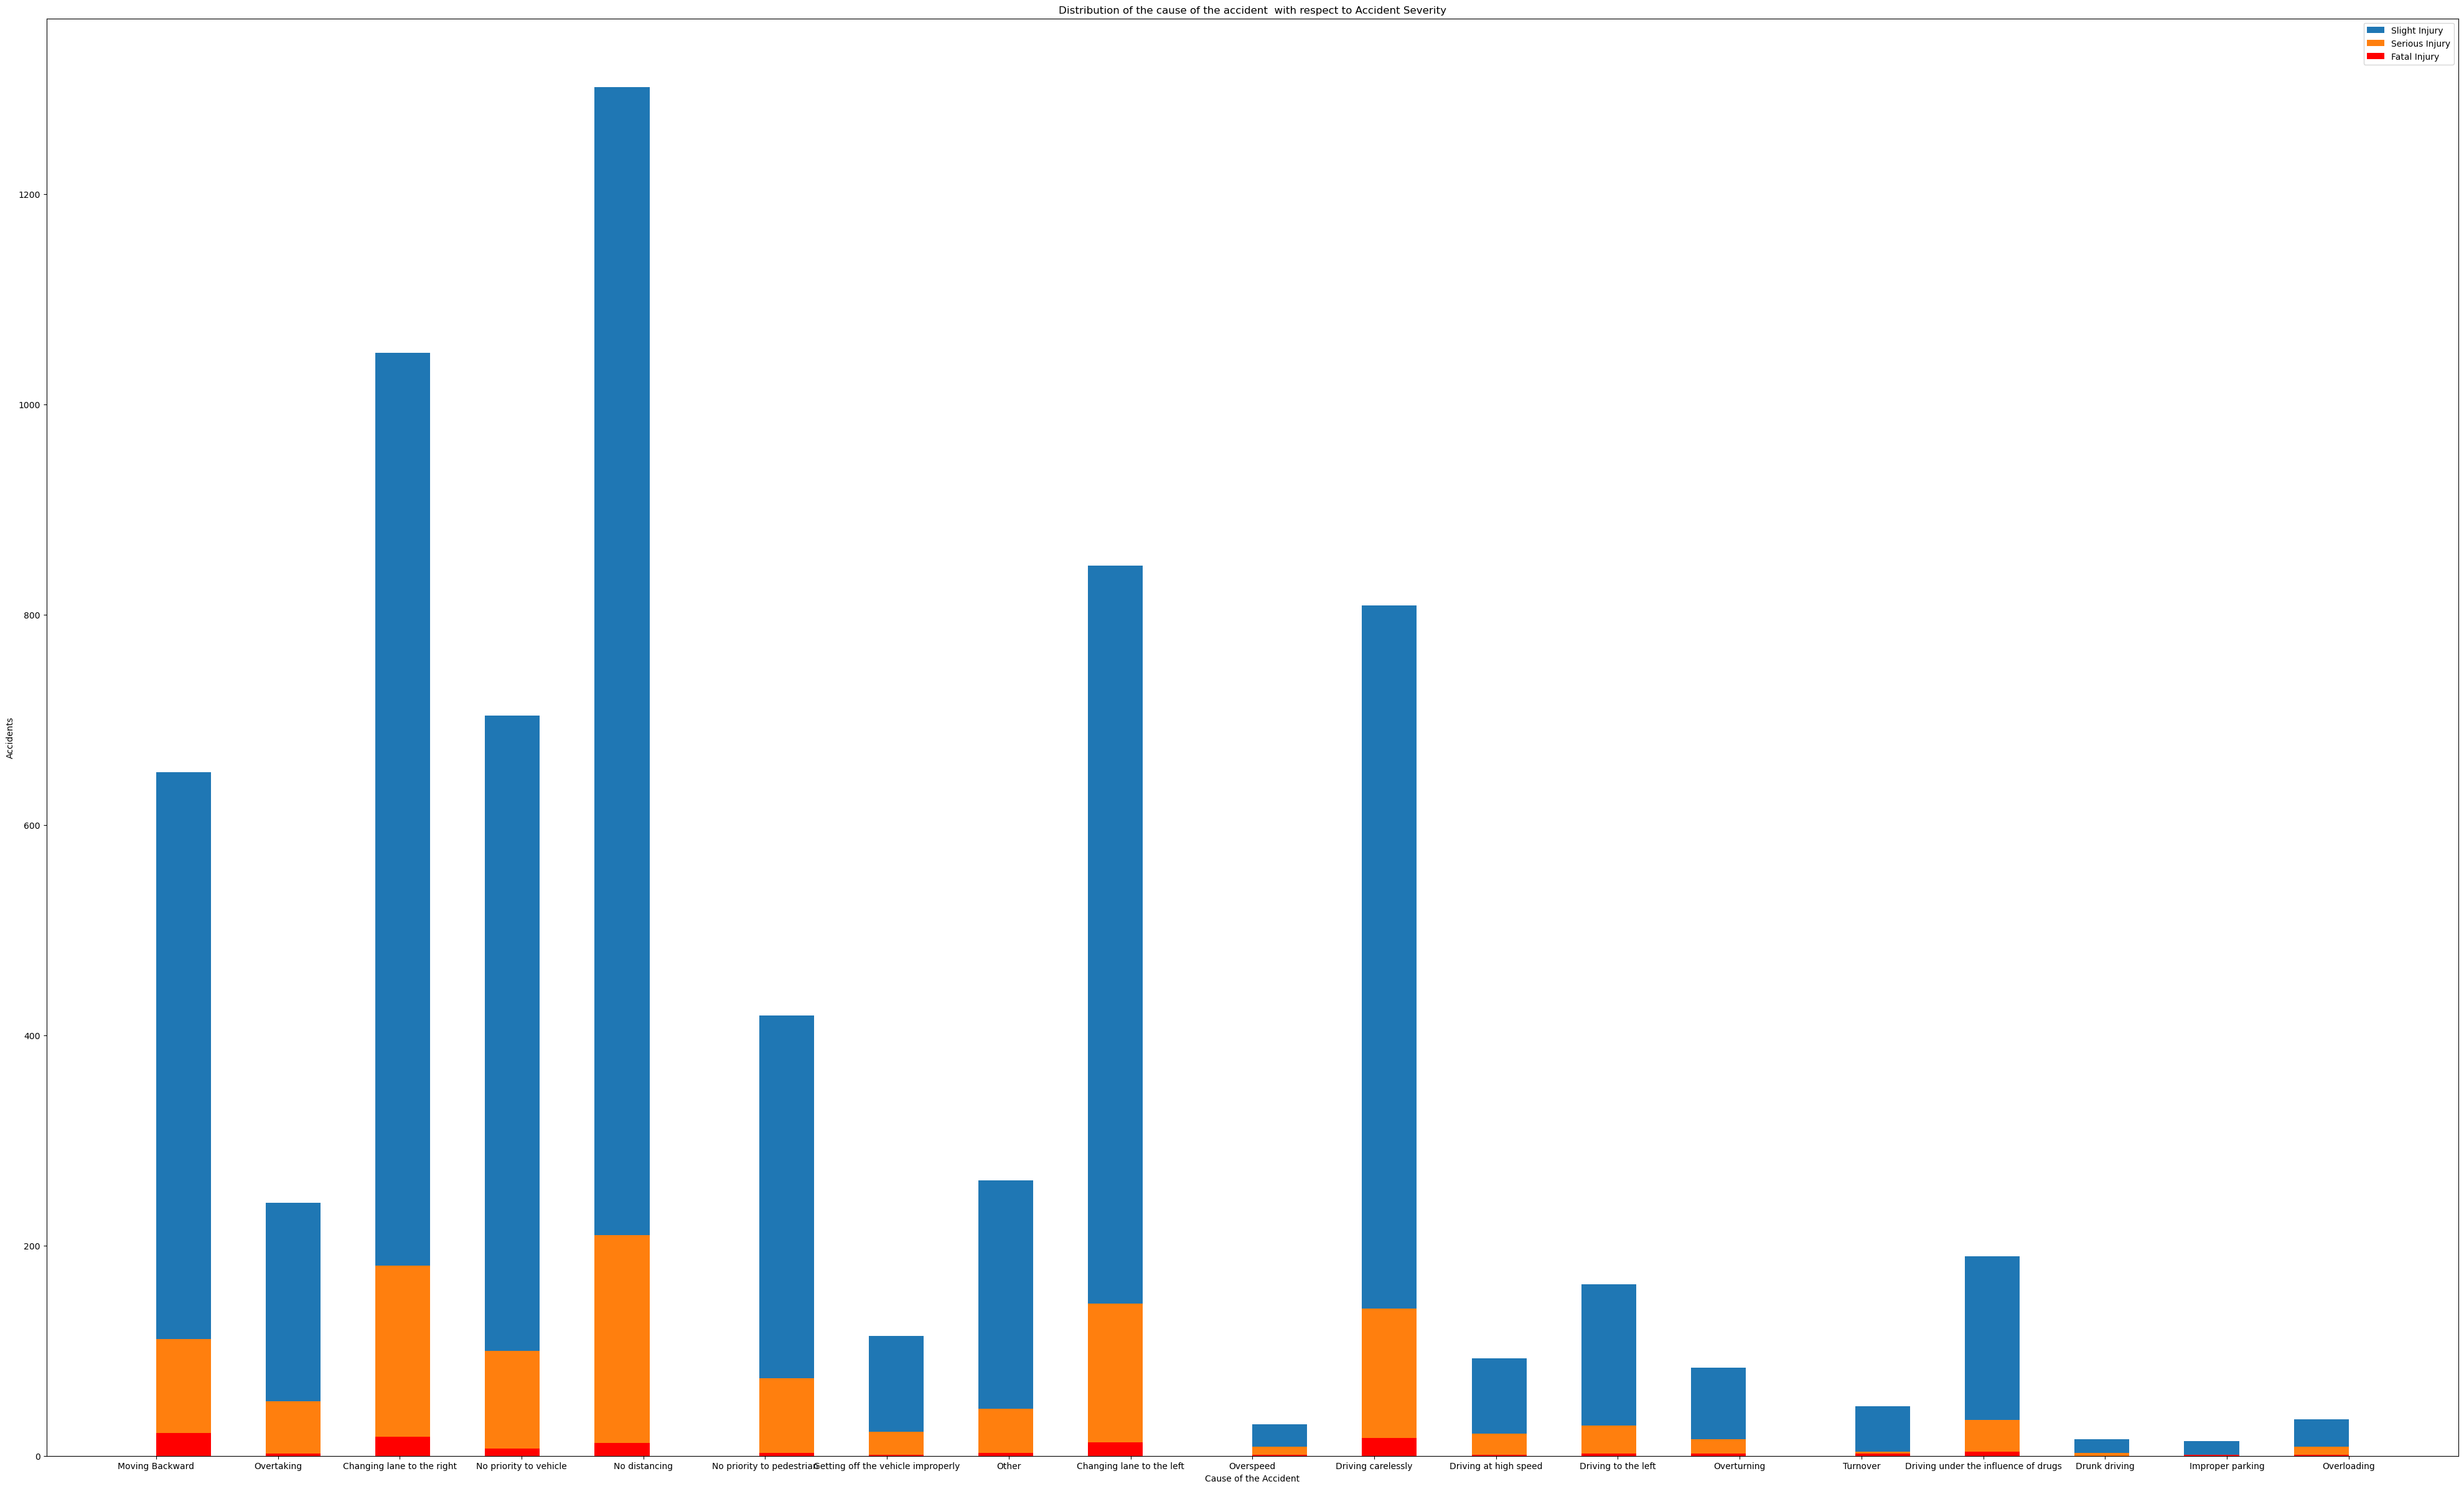

In [14]:
plt.figure(figsize=(50, 30))

# creating the histogram for cause of the accident
plt.hist(slight_injury["Cause_of_accident"], bins=40, alpha=1, label="Slight Injury")
plt.hist(serious_injury["Cause_of_accident"], bins=40, alpha=1, label="Serious Injury")
plt.hist(fatal_injury["Cause_of_accident"], bins=40, alpha=1, label="Fatal Injury", color='red')
plt.title("Distribution of the cause of the accident  with respect to Accident Severity")
plt.xlabel("Cause of the Accident")
plt.ylabel("Accidents")
plt.legend()
plt.show()

In [15]:
#code to check unique categorical features
for column in data:
    print(column,': ', data[column].unique().tolist())


Age_band_of_driver :  ['18-30', '31-50', 'Under 18', 'Over 51']
Vehicle_driver_relation :  ['Employee', 'Owner', 'Other']
Driving_experience :  ['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'No Licence', 'Below 1yr']
Types_of_Junction :  ['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other', 'T Shape', 'X Shape']
Road_surface_type :  ['Asphalt roads', 'Earth roads', 'Gravel roads', 'Other', 'Asphalt roads with some distress']
Light_conditions :  ['Daylight', 'Darkness - lights lit', 'Darkness - no lighting', 'Darkness - lights unlit']
Weather_conditions :  ['Normal', 'Raining', 'Raining and Windy', 'Cloudy', 'Other', 'Windy', 'Snow', 'Fog or mist']
Vehicle_movement :  ['Going straight', 'U-Turn', 'Turnover', 'Waiting to go', 'Moving Backward', 'Getting off', 'Reversing', 'Parked', 'Stopping', 'Overtaking', 'Other', 'Entering a junction']
Cause_of_accident :  ['Moving Backward', 'Overtaking', 'Changing lane to the left', 'Changing lane to the right', 'No priority to vehicle', 'No prior

In [16]:
#converting categorical features to numeric
# mapping the variables
data.Age_band_of_driver = data.Age_band_of_driver.map({'Under 18':0, '18-30':1, '31-50': 2, 'Over 51': 3}) 
data.Driving_experience = data.Driving_experience.map({'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2 , '2-5yr': 3, '5-10yr': 4, 'Above 10yr': 5})
data.Road_surface_type = data.Road_surface_type.map({'Earth roads': 0 , 'Gravel roads': 1, 'Asphalt roads with some distress': 2, 'Asphalt roads': 3, 'Other': 4})
data.Light_conditions = data.Light_conditions.map({'Daylight': 0, 'Darkness - lights lit': 1, 'Darkness - lights unlit': 2, 'Darkness - no lighting': 3})
data.Types_of_Junction = data.Types_of_Junction.map({'No junction': 0,'Crossing': 1, 'Y Shape': 2, 'T Shape': 3, 'X Shape': 4, 'O Shape': 5, 'Other': 6})
data.Vehicle_driver_relation = data.Vehicle_driver_relation.map({'Owner':0, 'Employee': 1, 'Other': 2})
data.Weather_conditions = data.Weather_conditions.map({'Normal': 0, 'Cloudy': 1, 'Windy':2, 'Fog or mist': 3, 'Raining': 4, 'Raining and Windy': 5, 'Snow': 6, 'Other': 7})


data[['Vehicle_movement', 'Cause_of_accident']] = data[['Vehicle_movement', 'Cause_of_accident']].apply(lambda x: pd.factorize(x)[0])
print(data.head)
#data.Vehicle_movement = data.Vehicle_movement.pd.factorize(['Going straight', 'U-Turn', 'Turnover', 'Waiting to go', 'Moving Backward', 'Getting off', 'Reversing', 'Parked', 'Stopping', 'Overtaking', 'Other', 'Entering a junction'], use_na_sentinel = True)
#data.Cause_of_accident = data.Cause_of_accident.pd.factorize(['Moving Backward', 'Overtaking', 'Changing lane to the left', 'Changing lane to the right', 'No priority to vehicle', 'No priority to pedestrian', 'No distancing', 'Getting off the vehicle improperly', 'Overloading', 'Other', 'Overspeed', 'Driving carelessly', 'Driving at high speed', 'Driving to the left', 'Overturning', 'Turnover', 'Driving under the influence of drugs', 'Drunk driving', 'Improper parking'], use_na_sentinel=True)

<bound method NDFrame.head of        Age_band_of_driver  Vehicle_driver_relation  Driving_experience  \
0                       1                        1                   2   
1                       2                        1                   5   
2                       1                        1                   2   
3                       1                        1                   4   
4                       1                        1                   3   
...                   ...                      ...                 ...   
12309                   2                        1                   4   
12311                   2                        1                   3   
12313                   3                        1                   4   
12314                   1                        1                   5   
12315                   1                        1                   4   

       Types_of_Junction  Road_surface_type  Light_conditions  \
0               

In [17]:
# storing the updated dataframe into the new CSV file
data.to_csv(r'../Dataset/CleanedDataset.csv', index=False)

In [18]:
##splitting data into training set and test set
from sklearn.model_selection import train_test_split

X = data.drop(['Accident_severity'], axis = 1)
y = data.Accident_severity

#cross validation variable
cv_num = 5

#random state
r_state=1

#80/20 test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = r_state)

In [19]:
%%time
###linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

reg = LinearRegression() #create linear model
reg.fit(X_train, y_train) #fit linear model to train data

print('The R2 on the train data set is:', round(r2_score(y_train, reg.predict(X_train)),4))
#prediction of linear fitted model trained on training set to test data set
y_pred = reg.predict(X_test)

print('The R2 on the test data set is:', round(r2_score(y_test, y_pred),4))

### output the results of the linear model fitted using the 'statsmodels'
import statsmodels.api as sm
import matplotlib.pyplot as plt

#fitting model with statsmodels
x2 = sm.add_constant(X) #stasmodels says OLS function doesn't include an intercept so one must be added reference to .add_constant function
model = sm.OLS(y, x2)  # return a model object takes (endog, exog, missing, hasconst, kwargs)
model_fitted = model.fit()
print(model_fitted.summary())

The R2 on the train data set is: 0.0068
The R2 on the test data set is: 0.0031
                            OLS Regression Results                            
Dep. Variable:      Accident_severity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.990
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.10e-08
Time:                        20:36:32   Log-Likelihood:                -4399.0
No. Observations:                8388   AIC:                             8818.
Df Residuals:                    8378   BIC:                             8888.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

[-0.41133811 -0.38166554  2.03307557 ...  2.06185355 -0.54088497
 -0.50619363]


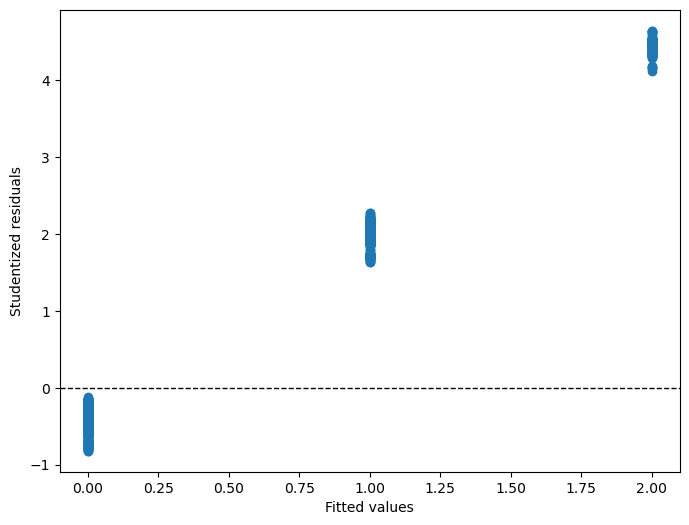

In [20]:
#create instance of influence
influence = model_fitted.get_influence()

#obtain studentized residuals
studentized_residuals = influence.resid_studentized_internal

#display studentized residuals
print(studentized_residuals)

plt.figure(figsize=(8, 6))
plt.scatter(y, studentized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

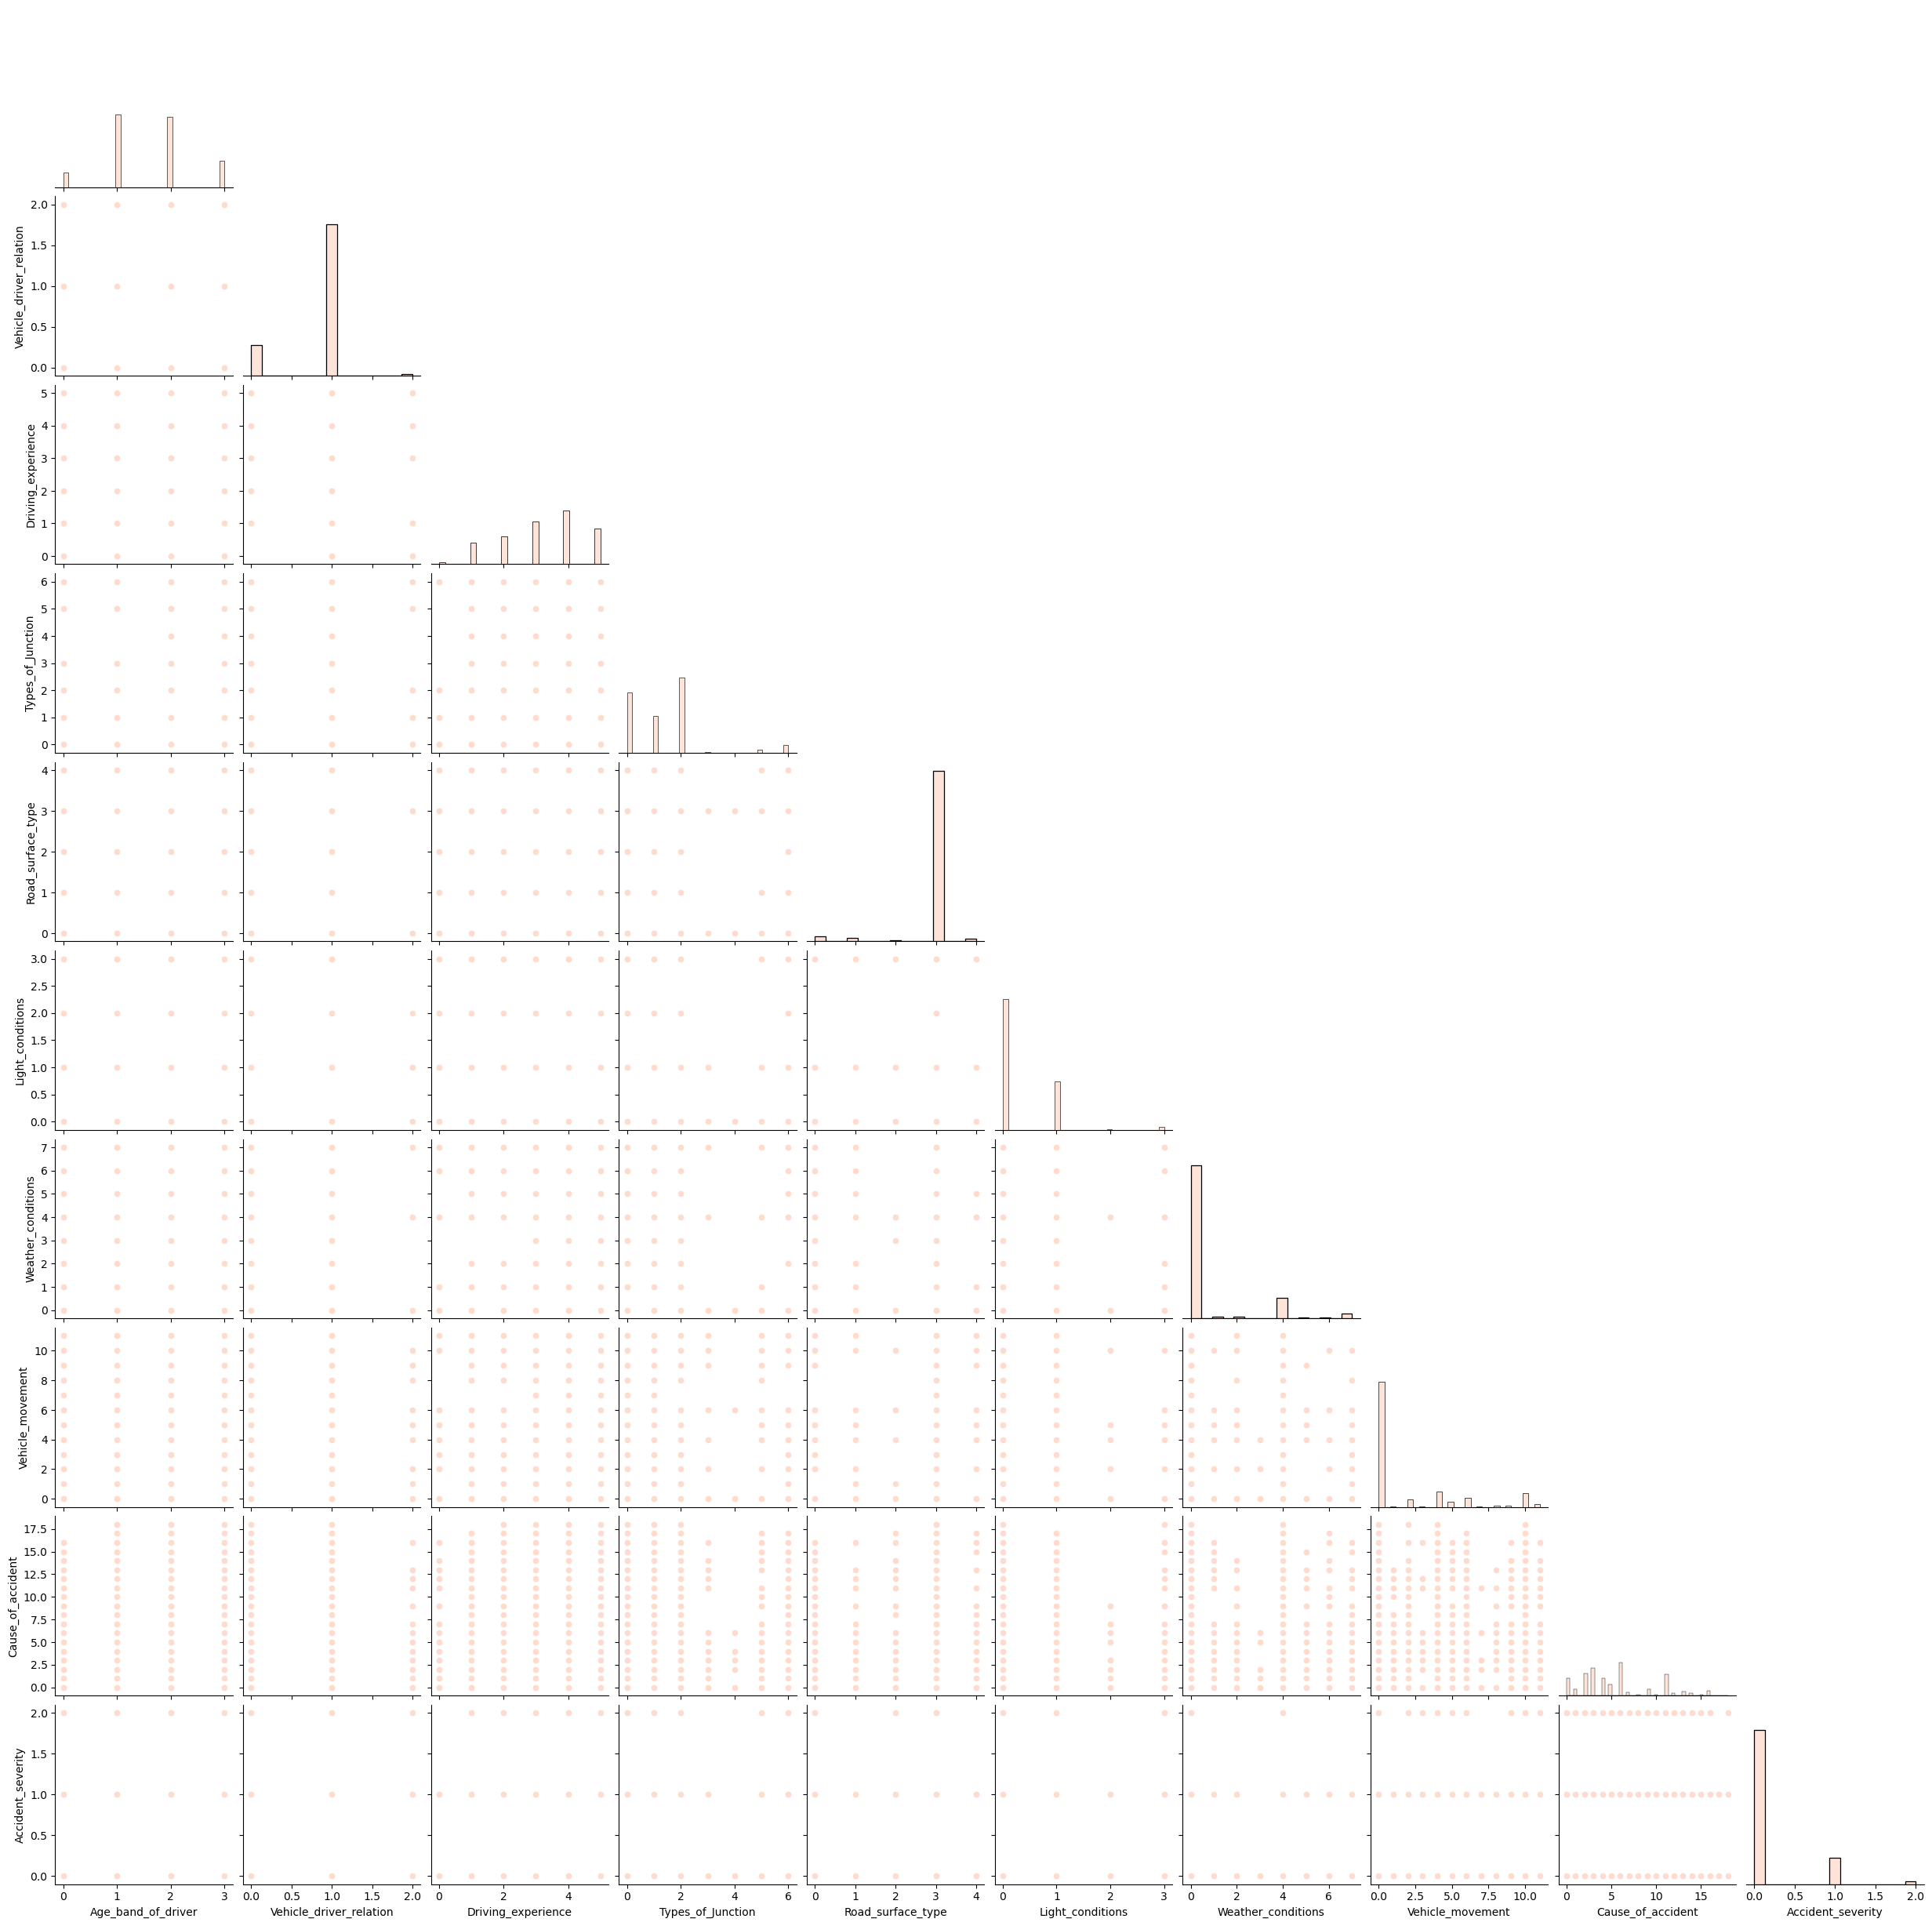

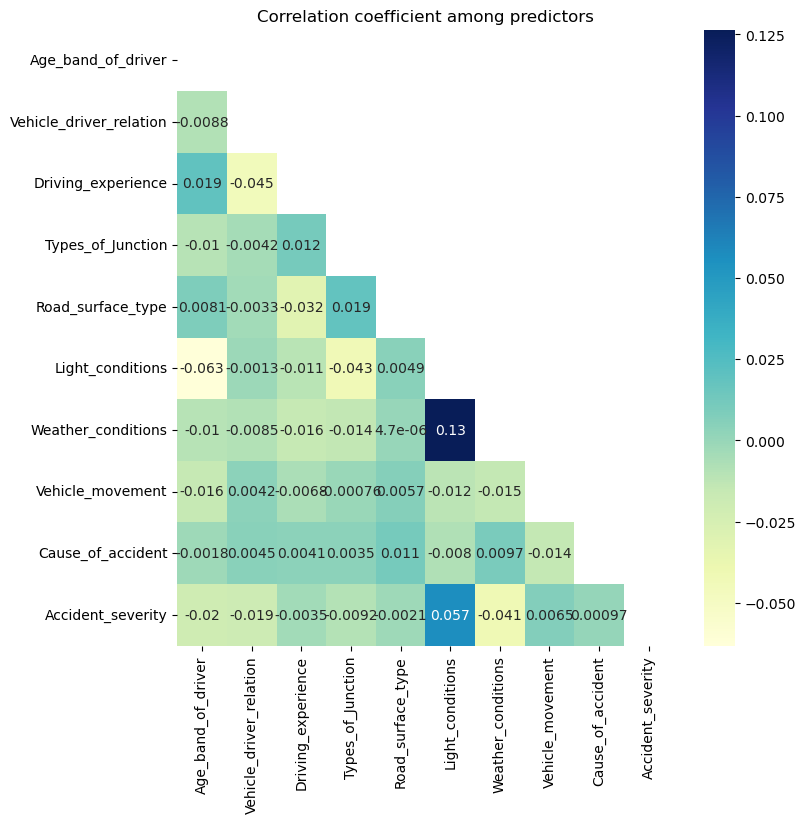

Wall time: 8.64 s


,VIF,features
4,11.4,Road_surface_type
2,6.1,Driving_experience
1,5.0,Vehicle_driver_relation
0,4.3,Age_band_of_driver
8,2.7,Cause_of_accident
3,1.9,Types_of_Junction
5,1.3,Light_conditions
7,1.3,Vehicle_movement
6,1.2,Weather_conditions


In [21]:
%%time
# draw a pairwise scatter plot between the all the columns
import matplotlib.pyplot as plt
import seaborn as sns   #better heatmap than plt

# pair-wise relation between numerical variables
sns.set_palette('Reds')
sns.pairplot(data, corner=True)
plt.show()

# draw the low half of the correlation matrix

# Generate a mask (selected index of array) to show the lower triangle only
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, mask=mask, cmap="YlGnBu")
plt.title('Correlation coefficient among predictors')
plt.show()

# calculate the VIF of each feature other than the 'crim'
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# calculate VIF
vif = pd.DataFrame()
#print(vif)
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#print(vif)
vif["features"] = X.columns
#print(vif)
vif = vif.sort_values(by='VIF',ascending=False)

# view
vif.round(1)

Empty DataFrame
Columns: []
Index: []
         VIF
0   4.316134
1   4.984028
2   5.977876
3  10.061043
4   1.166447
         VIF                 features
0   4.316134       Age_band_of_driver
1   4.984028  Vehicle_driver_relation
2   5.977876       Driving_experience
3  10.061043        Road_surface_type
4   1.166447        Accident_severity
                            OLS Regression Results                            
Dep. Variable:      Accident_severity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.668e+33
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        20:36:41   Log-Likelihood:             2.9039e+05
No. Observations:                8388   AIC:                        -5.808e+05
Df Residuals:                    8382   BIC:                        -5.807e+05
Df Model:               

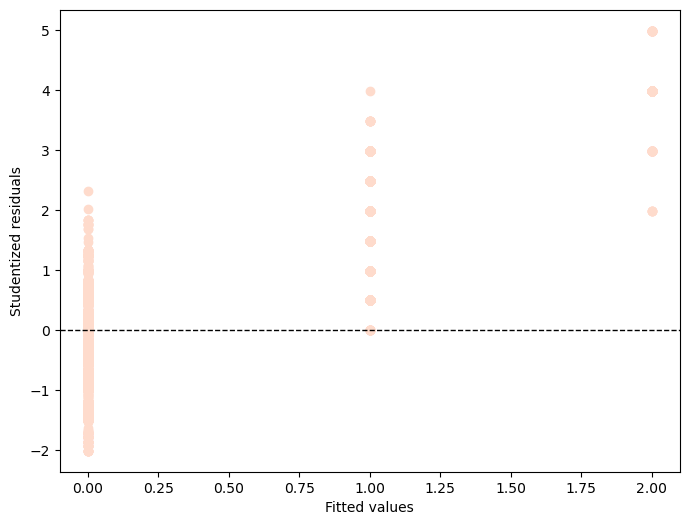

In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#recalculating VIF after dropping variables with high VIF's indicating colinearity
data_less_pred_corr = data.copy()
data_less_pred_corr = data_less_pred_corr.drop(['Cause_of_accident','Types_of_Junction','Light_conditions','Vehicle_movement', 'Weather_conditions'],axis=1)
vif_lpc_1 = pd.DataFrame() #VIF with less predictor correlation
print(vif_lpc_1)
vif_lpc_1["VIF"] = [variance_inflation_factor(data_less_pred_corr.values, i) for i in range(data_less_pred_corr.shape[1])]
print(vif_lpc_1)
vif_lpc_1["features"] = data_less_pred_corr.columns
print(vif_lpc_1)
vif_lpc_1 = vif_lpc_1.sort_values(by='VIF',ascending=False)

# view
vif_lpc_1.round(1)
    
#these are covered by the previously created array
x = data_less_pred_corr
x = x.to_numpy()  # pandas series to np array

#fitting model with statsmodels
x2 = sm.add_constant(x) #stasmodels says OLS function doesn't include an intercept so one must be added reference to .add_constant function
model_lpc_1 = sm.OLS(y, x2)  # return a model object takes (endog, exog, missing, hasconst, kwargs)
model_lpc_1_fitted = model_lpc_1.fit()

print(model_lpc_1_fitted.summary())
    
#create instance of influence
influence = model_lpc_1_fitted.get_influence()

#obtain studentized residuals
studentized_residuals = influence.resid_studentized_internal

plt.figure(figsize=(8, 6))
plt.scatter(y,studentized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

The R-squared of the model is: 0.00314
Wall time: 123 ms


(-0.0032827601122311753, 1.0)

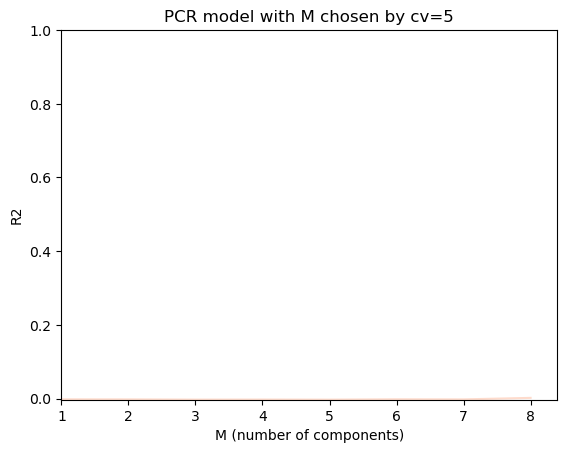

In [23]:
%%time
###PCR
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

#https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import scale

pca = PCA()
pca_transformer_train = pca.fit_transform(scale(X_train))

R2 = []
model = LinearRegression()

#forward subset selection on number of components
for i in np.arange(1, len(data.columns)):
    model.fit(X_train, y_train)
    score = model_selection.cross_val_score(model, pca_transformer_train[:,:i], y_train.ravel(), cv=cv_num, scoring='r2').mean()
    R2.append(score)

print(f'The R-squared of the model is: {round(model.score(X_test, y_test),5)}')

plt.plot(np.array(R2))
plt.xlabel('M (number of components)')
plt.ylabel('R2')
plt.title('PCR model with M chosen by cv=5')
plt.xlim(xmin=1)
plt.ylim(ymax=1);

In [24]:
###Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

alphas = 10**np.linspace(8,-2,150)*0.5

ridgecv = RidgeCV(alphas=alphas, cv=cv_num, scoring='r2')
ridgecv.fit(scale(X_train), y_train) 

ridge2 = Ridge(alpha=len(X)*11498/2)
ridge2.fit(scale(X_train), y_train)
y_pred = ridge2.predict(scale(X_test))

print('Optimal regularization parameter:', ridgecv.alpha_)
ridge2.set_params(alpha=ridgecv.alpha_)
ridge2.fit(scale(X_train), y_train)
print('RIDGE MSE:', mean_squared_error(y_test, ridge2.predict(scale(X_test))))

# print the coeffs
print(np.round(ridge2.coef_.flatten(),4))

Optimal regularization parameter: 1365.2482077276627
RIDGE MSE: 0.16187419793610672
[-0.0066 -0.005  -0.0018 -0.0009  0.0006  0.0221 -0.0169 -0.0001 -0.0002]


In [25]:
###Lasso
lasso = Lasso(max_iter=5000)
coefs = []

#for a in alphas*2:
#    lasso.set_params(alpha=a)
#    lasso.fit(scale(X_train), y_train)
#    coefs.append(lasso.coef_)

lassocv = LassoCV(alphas=None, cv=10, max_iter=10000) #10 cross folds
lassocv.fit(scale(X_train), y_train.values.ravel())
lassocv.alpha_

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)

print('LASSO MSE: ', mean_squared_error(y_test, lasso.predict(scale(X_test))))
# print the coeffs
print(np.round(lasso.coef_.flatten(),4))

LASSO MSE:  0.16194440490970172
[-0.0046 -0.0026 -0.     -0.      0.      0.0235 -0.0172 -0.     -0.    ]


In [26]:
###PLS

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV, KFold

names = ['R-Squared']

##
mle_class = data.value_counts().idxmax()
mle_train_accuracy = len(y_train.loc[y_train == mle_class]) / len(y_train)
mle_test_accuracy = len(y_test.loc[y_test == mle_class]) / len(y_test)
scores = [[mle_train_accuracy, mle_test_accuracy]]
##

# Define the PLS regression object
pls = PLSRegression()

# Define the parameter grid for the number of components

param_grid = {"n_components": range(1, X_train.shape[1])}

# Perform a grid search over the parameter grid using cross-validation
grid_search = GridSearchCV(pls, param_grid=param_grid, cv=cv_num, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best number of components and the corresponding mean squared error
num_components = grid_search.best_params_["n_components"]

# Calculate the accuracy
grid_search_train_accuracy = grid_search.score(X_train, y_train)
grid_search_test_accuracy = grid_search.score(X_test, y_test)

print(f'PLS Regression w/ 5-fold CV ({num_components} components) has an R-squared of', f'{round(grid_search_test_accuracy,5)}')

PLS Regression w/ 5-fold CV (3 components) has an R-squared of 0.00314


Optimal value of {'max_depth': 1}
Training MSE is: 0.16907105778857032
Testing MSE is: 0.16151672087927932


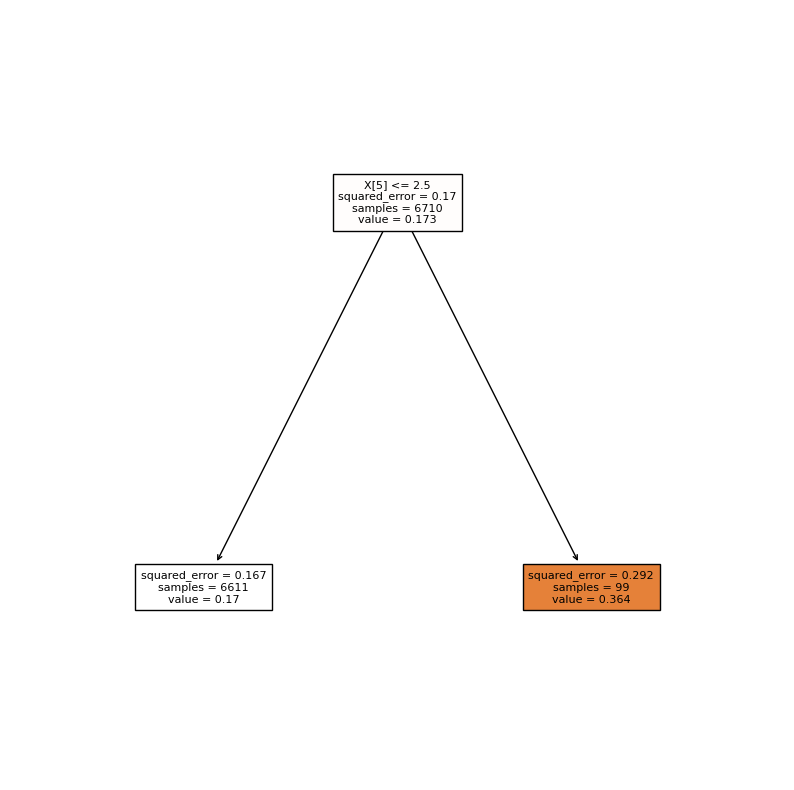

Wall time: 438 ms


In [27]:
%%time
### Decision Tree

#parameters = {'max_depth':(2,4,6,8,10)}
parameters = {'max_depth': range(1,10)}
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

#return_train_score=True allows for train score to be tracked later on if needed
clf = GridSearchCV(tree.DecisionTreeRegressor(random_state=r_state), parameters, cv=cv_num, scoring=mse_scorer, return_train_score=True)
clf.fit(X_train, y_train)

tree_model = clf.best_estimator_
print('Optimal value of '+ str(clf.best_params_))

p = tree_model.predict(X_train)
print("Training MSE is: " + str(mean_squared_error(p, y_train)))

p = tree_model.predict(X_test)
print("Testing MSE is: " + str(mean_squared_error(p, y_test)))
###


# Set size for the plot
plt.figure(figsize=(10,10))
# Plot the tree (use filled for more clarity)
plot_tree(tree_model, filled = True, fontsize=8)

plt.show() # Display the plot.

In [28]:
X.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Vehicle_movement,Cause_of_accident
0,1,1,2,0,3,0,0,0,0
1,2,1,5,0,3,0,0,0,1
2,1,1,2,0,3,0,0,0,2
3,1,1,4,2,0,1,0,0,3
4,1,1,3,2,3,1,0,0,1


Optimal values:  {'n_estimators': 9}
Training MSE is: 0.0761
Testing MSE is: 0.1952


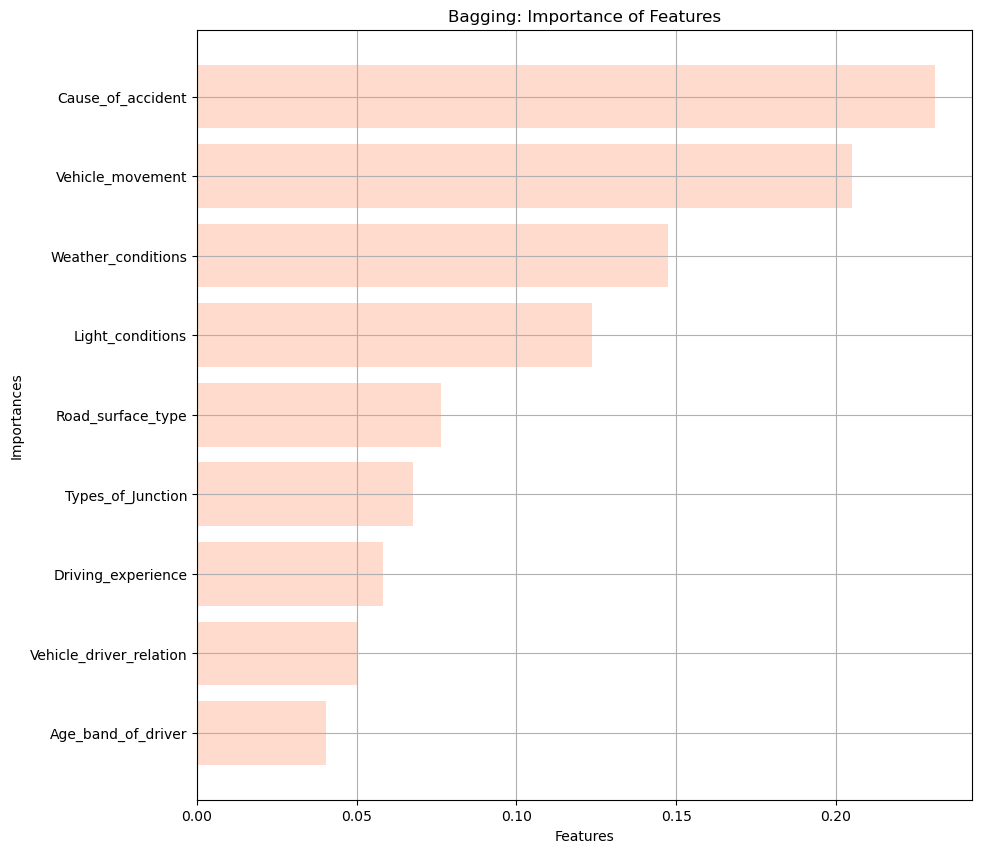

Wall time: 1.74 s


In [29]:
%%time
### Bagging

#bagging = BaggingRegressor(random_state=r_state)
#bagging.fit(X=X_train, y=y_train.values.ravel())
#p = bagging.predict(X_test)
#print("Test MSE is: " + str(mean_squared_error(p, y_test)))

parameters = {'n_estimators': np.arange(1, len(data.columns), 1)}
#cross validation with parameters and 5-folds
clf = GridSearchCV(ensemble.BaggingRegressor(random_state=r_state), parameters, cv=cv_num)
clf.fit(X_train, y_train.values.ravel())
bagged_tree_model = clf.best_estimator_
print ("Optimal values: ", clf.best_params_)

p = bagged_tree_model.predict(X_train)
print("Training MSE is: " + str(round(mean_squared_error(p, y_train),4)))

p = bagged_tree_model.predict(X_test)
print("Testing MSE is: " + str(round(mean_squared_error(p, y_test),4)))

feature_importances = np.mean([tree.feature_importances_ for tree in bagged_tree_model.estimators_], axis=0)
feature_importances.sort()

plt.figure(figsize=(10,10))
plt.barh(X_train.columns.tolist(), feature_importances)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title("Bagging: Importance of Features")
plt.grid()
plt.show()

Optimal values:  {'max_depth': 3, 'n_estimators': 3}
Training MSE is: 0.1667
Testing MSE is: 0.161


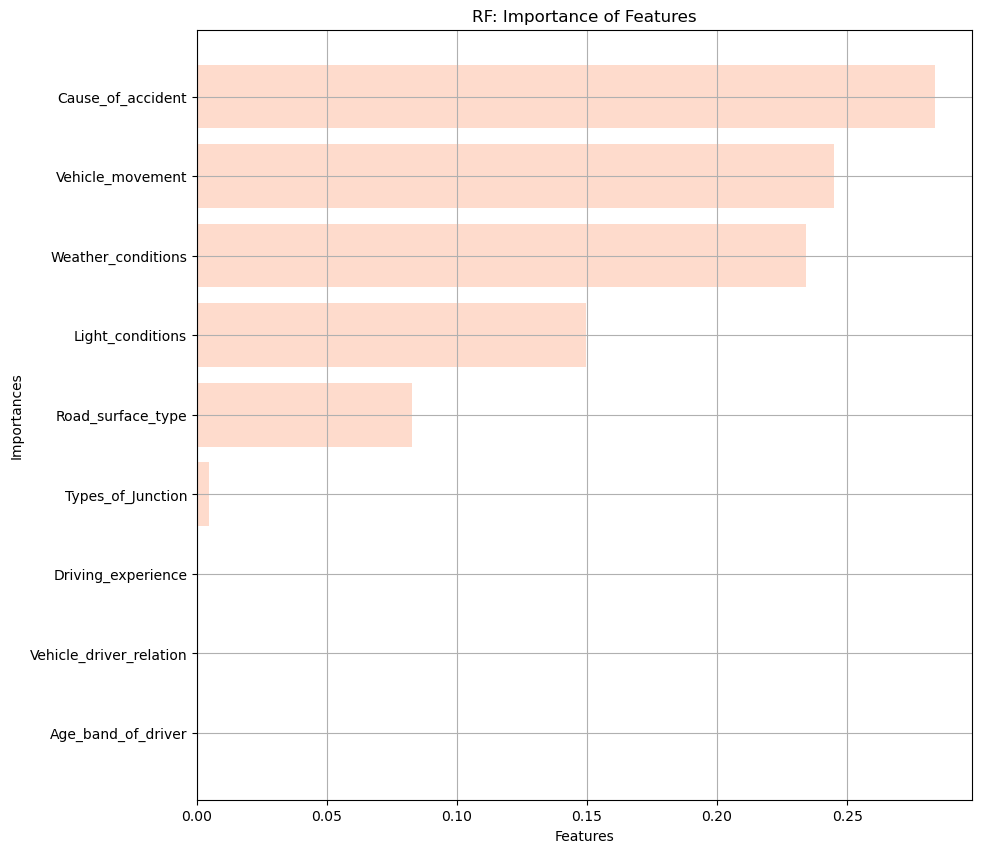

Wall time: 6.73 s


In [30]:
%%time
### Random Forests

parameters = {'max_depth': range(1,10), 'n_estimators': np.arange(1, len(data.columns), 1)}
#cross validation with parameters and 5-folds
clf = GridSearchCV(ensemble.RandomForestRegressor(random_state=r_state), parameters, cv=cv_num)
clf.fit(X_train, y_train.values.ravel())
forest_model = clf.best_estimator_
print ("Optimal values: ", clf.best_params_)

p = forest_model.predict(X_train)
print("Training MSE is: " + str(round(mean_squared_error(p, y_train),4)))

p = forest_model.predict(X_test)
print("Testing MSE is: " + str(round(mean_squared_error(p, y_test),4)))


feature_importances = np.mean([tree.feature_importances_ for tree in forest_model.estimators_], axis=0)
feature_importances.sort()

plt.figure(figsize=(10,10))
plt.barh(X_train.columns.tolist(), feature_importances)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title("RF: Importance of Features")
plt.grid()
plt.show()
###

In [31]:
%%time
###XGB
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier    # python.exe -m pip install xgboost

# define the parameter grids to search over
params = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001]
}

# perform grid search for XGBoost
xgb_model = XGBClassifier(objective='binary:logistic')
xgb_grid = GridSearchCV(xgb_model, params, cv=cv_num, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)

# fit best XGBoost model and evaluate
xgb_best = XGBClassifier(**xgb_grid.best_params_)
xgb_best.fit(X_train, y_train)
y_train_xgb = xgb_best.predict(X_train)
y_test_xgb = xgb_best.predict(X_test)

p = xgb_best.predict(X_train)
print("Training MSE is: " + str(round(mean_squared_error(p, y_train),4)))

p = xgb_best.predict(X_test)
print("Testing MSE is: " + str(round(mean_squared_error(p, y_test),4)))

Training MSE is: 0.196
Testing MSE is: 0.1877
Wall time: 19.1 s


In [32]:
%%time
###XGB accuracy
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier    # python.exe -m pip install xgboost

# define the parameter grids to search over
params = {
    #'max_depth': range(1, 10, 1),
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001]
}

# perform grid search for XGBoost
xgb_model = XGBClassifier(objective='binary:logistic')
xgb_grid = GridSearchCV(xgb_model, params, cv=cv_num, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# fit best XGBoost model and evaluate
xgb_best = XGBClassifier(**xgb_grid.best_params_)
xgb_best.fit(X_train, y_train)
y_train_xgb = xgb_best.predict(X_train)
y_test_xgb = xgb_best.predict(X_test)

p = xgb_best.predict(X_train)
print("Training Accuracy is: " + str(round(accuracy_score(p, y_train),4)))

p = xgb_best.predict(X_test)
print("Testing Accuracy is: " + str(round(accuracy_score(p, y_test),4)))

Training Accuracy is: 0.8429
Testing Accuracy is: 0.8534
Wall time: 19.4 s


In [33]:
%%time
###XGB accuracy
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier    # python.exe -m pip install xgboost

# define the parameter grids to search over
params = {
    'max_depth': range(1, 10, 1),
    #'max_depth': [5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001]
}

# perform grid search for XGBoost
xgb_model = XGBClassifier(objective='binary:logistic')
xgb_grid = GridSearchCV(xgb_model, params, cv=cv_num, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# fit best XGBoost model and evaluate
xgb_best = XGBClassifier(**xgb_grid.best_params_)
xgb_best.fit(X_train, y_train)
y_train_xgb = xgb_best.predict(X_train)
y_test_xgb = xgb_best.predict(X_test)

p = xgb_best.predict(X_train)
print("Training Accuracy is: " + str(round(accuracy_score(p, y_train),4)))

p = xgb_best.predict(X_test)
print("Testing Accuracy is: " + str(round(accuracy_score(p, y_test),4)))

Training Accuracy is: 0.8405
Testing Accuracy is: 0.854
Wall time: 40.6 s


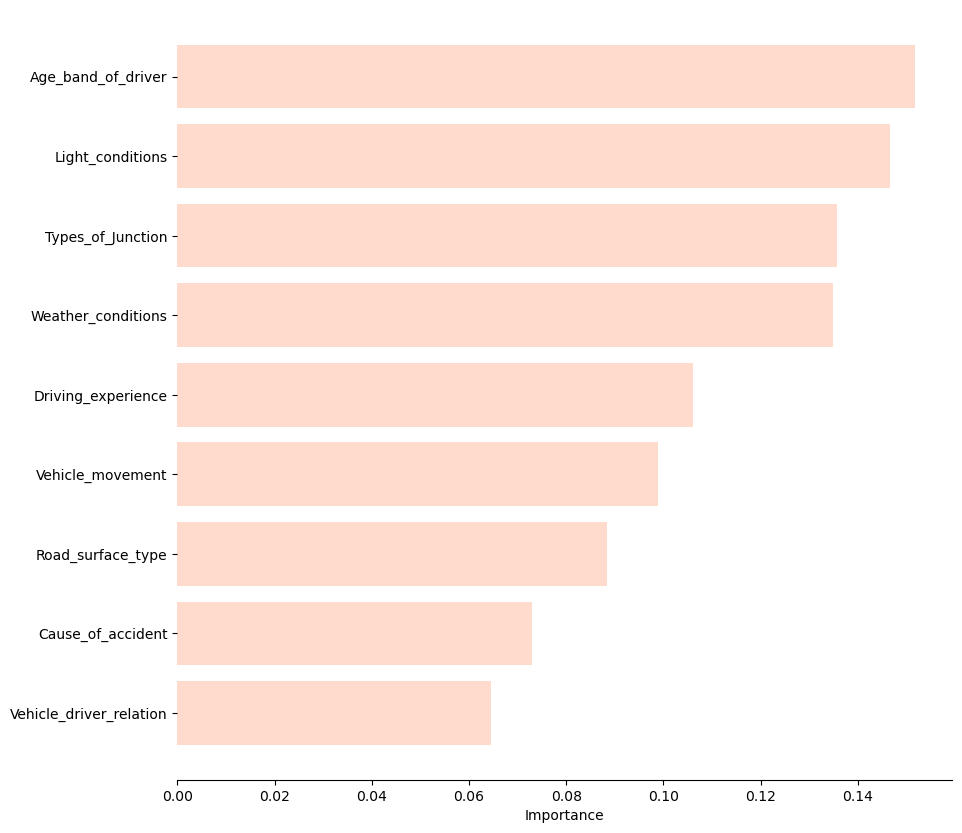

Wall time: 161 ms


In [34]:
%%time
# get feature importances for XGB
importances = xgb_best.feature_importances_

# create a dataframe of feature importances with column names
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': importances})

# sort features by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=True).reset_index(drop=True)

# plot feature importances
plt.figure(figsize=(10, 10))
plt.barh(feature_importances['feature'], feature_importances['importance'])
# plt.xticks(rotation=45)
# plt.xlabel('Features')
plt.xlabel('Importance')
# hide the top and right axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [35]:
%%time
#new code to check how using all data affects results as suggested/asked by professor after presentation on 5/2/23
# deep copy the dataset for og unclean data
data_1 = og_data.copy()

# replacing the value for accident severity
data_1.Accident_severity = data_1.Accident_severity.map({'Slight Injury':0, 'Serious Injury':1, 'Fatal injury':2})

#code to check unique categorical features
for column in data_1:
    print(column,': ', data_1[column].unique().tolist())

#converting categorical features to numeric
# mapping the variables
data_1.Age_band_of_driver = data_1.Age_band_of_driver.map({'Under 18':0, '18-30':1, '31-50': 2, 'Over 51': 3}) 
data_1.Driving_experience = data_1.Driving_experience.map({'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2 , '2-5yr': 3, '5-10yr': 4, 'Above 10yr': 5})
data_1.Road_surface_type = data_1.Road_surface_type.map({'Earth roads': 0 , 'Gravel roads': 1, 'Asphalt roads with some distress': 2, 'Asphalt roads': 3, 'Other': 4})
data_1.Light_conditions = data_1.Light_conditions.map({'Daylight': 0, 'Darkness - lights lit': 1, 'Darkness - lights unlit': 2, 'Darkness - no lighting': 3})
data_1.Types_of_Junction = data_1.Types_of_Junction.map({'No junction': 0,'Crossing': 1, 'Y Shape': 2, 'T Shape': 3, 'X Shape': 4, 'O Shape': 5, 'Other': 6})
data_1.Vehicle_driver_relation = data_1.Vehicle_driver_relation.map({'Owner':0, 'Employee': 1, 'Other': 2})
data_1.Weather_conditions = data_1.Weather_conditions.map({'Normal': 0, 'Cloudy': 1, 'Windy':2, 'Fog or mist': 3, 'Raining': 4, 'Raining and Windy': 5, 'Snow': 6, 'Other': 7})


data_1[['Time','Day_of_week', 'Sex_of_driver', 'Educational_level', 'Type_of_vehicle', 'Owner_of_vehicle', 
        'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
        'Road_surface_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties',
        'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
        'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
        'Cause_of_accident']] = data_1[['Time','Day_of_week', 'Sex_of_driver', 'Educational_level', 'Type_of_vehicle',
                                        'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle',
                                        'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
                                        'Road_surface_conditions', 'Type_of_collision', 'Number_of_vehicles_involved',
                                        'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
                                        'Age_band_of_casualty','Casualty_severity','Work_of_casuality','Fitness_of_casuality',
                                        'Pedestrian_movement', 'Cause_of_accident']].apply(lambda x: pd.factorize(x)[0])
print(data_1.head)

##splitting not cleaned data into training set and test set
from sklearn.model_selection import train_test_split

X_og = data_1.drop(['Accident_severity'], axis = 1)
y_og = data_1.Accident_severity

##new testtrain split for all data: 80/20 test train split
X_og_train, X_og_test, y_og_train, y_og_test = train_test_split(X_og, y_og, train_size = 0.8, random_state = r_state)


Time :  ['17:02:00', '1:06:00', '14:15:00', '17:30:00', '17:20:00', '14:40:00', '17:45:00', '22:45:00', '8:20:00', '15:10:00', '12:11:00', '18:36:00', '14:35:00', '12:25:00', '15:30:00', '18:10:00', '15:25:00', '13:57:00', '20:30:00', '16:30:00', '21:50:00', '9:12:00', '10:36:00', '18:19:00', '19:12:00', '11:38:00', '13:30:00', '12:39:00', '12:30:00', '16:55:00', '18:25:00', '13:01:00', '13:45:00', '18:45:00', '11:02:00', '15:55:00', '15:00:00', '20:00:00', '18:48:00', '23:25:00', '7:40:00', '15:17:00', '15:50:00', '9:45:00', '17:35:00', '20:50:00', '21:32:00', '19:55:00', '16:10:00', '23:36:00', '17:54:00', '18:04:00', '17:00:00', '1:15:00', '18:30:00', '15:52:00', '12:33:00', '8:59:00', '17:25:00', '0:53:00', '15:20:00', '18:23:00', '5:24:00', '12:15:00', '22:15:00', '6:35:00', '17:34:00', '4:00:00', '8:50:00', '0:25:00', '0:10:00', '1:05:00', '19:40:00', '19:08:00', '17:50:00', '21:30:00', '14:49:00', '17:40:00', '21:55:00', '7:30:00', '10:41:00', '13:16:00', '11:30:00', '16:20:00',

In [36]:
%%time
### XGBoost accuracy with all data not just cleaned. 

from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier    # python.exe -m pip install xgboost

# define the parameter grids to search over
params = {
    'max_depth': range(1, 10, 1),
    #'max_depth': [5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001]
}

# perform grid search for XGBoost
xgb_og_model = XGBClassifier(objective='binary:logistic')
xgb_og_grid = GridSearchCV(xgb_og_model, params, cv=cv_num, scoring='accuracy')

xgb_og_grid.fit(X_og_train, y_og_train)

# fit best XGBoost model and evaluate
xgb_og_best = XGBClassifier(**xgb_og_grid.best_params_)
xgb_og_best.fit(X_og_train, y_og_train)

y_og_train_xgb = xgb_og_best.predict(X_og_train)
y_og_test_xgb = xgb_og_best.predict(X_og_test)

p_og = xgb_og_best.predict(X_og_train)
print("XGB Training Accuracy with og data is: " + str(round(accuracy_score(p_og, y_og_train),4)))

p_og = xgb_og_best.predict(X_og_test)
print("XGB Testing Accuracy with og data is: " + str(round(accuracy_score(p_og, y_og_test),4)))

XGB Training Accuracy with og data is: 0.9528
XGB Testing Accuracy with og data is: 0.8677
Wall time: 1min 50s


In [37]:
#not used
###SVC 
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC

import copy
#plot_svc function from class notes
# Define a function to plot a classifier with support vectors.
#used in gridsearchcv
def plot_svc(svc, X, y, h=0.02, pad=1):
    # Set the limits for the x and y axes
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    
    # Create a meshgrid for the plot
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the class labels for the meshgrid points
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries using a contour plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    # Plot the data points with different colors for different classes
    plt.scatter(X[:,0], X[:,1], s=100, c=y, cmap=plt.cm.Paired)
    
    # Mark support vectors
    sv = svc.best_estimator_.support_vectors_ ##can't use .support_vectors_ insided of GridSearchCV
    
    plt.scatter(sv[:,0], sv[:,1], color='k', marker='x', s=80, linewidths=1)
    
    # Set the limits and labels for the plot
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')


#used outside gridsearchcv
def plot_svc1(svc, X, y, h=0.02, pad=0.25):
    
    # Set the limits for the x and y axes
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    
    # Create a meshgrid for the plot
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the class labels for the meshgrid points
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries using a contour plot
    # plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    # Plot the data points with different colors for different classes
    plt.scatter(X[:,0], X[:,1], s=100, c=y, cmap=plt.cm.Paired)
    
    # Mark support vectors
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], color='k', marker='x', s=80, linewidths=1)
    
    # Set the limits and labels for the plot
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')

In [38]:
%%time
#RBF kernel
rbf_parameters = [{'C': [0.1, 1, 10, 100],
                   'gamma': [0.1, 0.5, 1, 5]}]

clf_rbf = GridSearchCV(SVC(kernel='rbf'), rbf_parameters, cv=cv_num, scoring='accuracy', return_train_score=True)
clf_rbf.fit(X_train, y_train)

# the best C
print(f'The optimal value of C is: {clf_rbf.best_params_["C"]}')
print(f'The optimal value of gamma is: {clf_rbf.best_params_["gamma"]}')

#plot_svc(clf_rbf, X_test, y_test)
#plot_svc(clf_rbf_best, X_train, y_train)
print(f'The accuracy of the model on the train set is: {clf_rbf.best_estimator_.score(X_train, y_train)}')
print(f'The accuracy of the model on the test set is: {clf_rbf.best_estimator_.score(X_test, y_test)}')

clf_rbf_best = SVC(C = clf_rbf.best_params_["C"], kernel = 'rbf', gamma = clf_rbf.best_params_["gamma"])

The optimal value of C is: 0.1
The optimal value of gamma is: 0.1
The accuracy of the model on the train set is: 0.8402384500745157
The accuracy of the model on the test set is: 0.8528009535160905
Wall time: 7min 26s
